In [1]:
import torch
import torch.nn.functional as F
import torch_geometric.nn as gnn
from torch_geometric.nn import GATConv
import numpy as np

In [2]:

seed = 30
torch.manual_seed(seed)

# If using GPU, set the random seed for the GPU as well



use_cuda=torch.cuda.is_available()

device=torch.device("cuda:3" if use_cuda else "cpu")

print("D:",device)

if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed)
#torch.cuda.empty_cache()

D: cuda:3


Model

In [3]:
# class CorGAT(torch.nn.Module):
#     def __init__(self):
#         super(CorGAT, self).__init__()

#         self.hid = 8
#         self.in_head = 8
#         self.out_head = 1

#         self.conv1 = GATConv(2, self.hid, heads=self.in_head)
#         self.conv2 = GATConv(self.hid * self.in_head, self.out_head, concat=False, heads=1)
#         self.fc = torch.nn.Linear(self.hid * self.in_head, 1)

#         self.bn1_mean = torch.nn.BatchNorm1d(self.hid * self.in_head)

#     def forward(self, data):
#         x, edge_index = data.x, data.edge_index
#         print("c0:",x.shape)
#         x = self.conv1(x, edge_index)
#         print("c1:",x.shape)
#         x = F.relu(x)
#         x = self.bn1_mean(x)
#         x = self.conv2(x, edge_index)
#         print("c2:",x.shape)
#         x = x.view(x.size(0), -1)  # Reshape to (batch_size, input_size)
#         print("c3:",x.shape)
#         x = self.fc(x)
#         return F.log_softmax(x, dim=1)

               

In [26]:
# import torch
# import torch.nn.functional as F
# from torch_geometric.nn import GATConv, BatchNorm

# class CorGAT(torch.nn.Module):
#     def __init__(self):
#         super(CorGAT, self).__init__()

#         self.gat1 = GATConv(3, 6, heads=3, concat=True)
#         self.gat2 = GATConv(18, 25, heads=3, concat=True)
#         self.gat3 = GATConv(75, 80, heads=3, concat=True)
    
#         self.bn1 = BatchNorm(18)
#         self.bn2 = BatchNorm(75)
#         self.bn3 = BatchNorm(240)
        
#         self.fc = torch.nn.Linear(240, 1)

#     def forward(self, data):
#         x, edge_index = data.x, data.edge_index

#         x = self.gat1(x, edge_index)
#         x = F.relu(x)
#         x = self.bn1(x)
        
#         x = self.gat2(x, edge_index)
#         x = F.relu(x)
#         x = self.bn2(x)
        
#         x = self.gat3(x, edge_index)
#         x = F.relu(x)
#         x = self.bn3(x)
        
#         x = self.fc(x)
        
#         return torch.sigmoid(x)
# model = CorGAT()   
# total_params = sum(p.numel() for p in model.parameters())
# for name, param in model.named_parameters():
#     print(f"{name}: {param.numel()} parameters")

# print(f"\nTotal number of learnable parameters in the model: {total_params}")


gat1.att_src: 18 parameters
gat1.att_dst: 18 parameters
gat1.bias: 18 parameters
gat1.lin_src.weight: 54 parameters
gat2.att_src: 75 parameters
gat2.att_dst: 75 parameters
gat2.bias: 75 parameters
gat2.lin_src.weight: 1350 parameters
gat3.att_src: 240 parameters
gat3.att_dst: 240 parameters
gat3.bias: 240 parameters
gat3.lin_src.weight: 18000 parameters
bn1.module.weight: 18 parameters
bn1.module.bias: 18 parameters
bn2.module.weight: 75 parameters
bn2.module.bias: 75 parameters
bn3.module.weight: 240 parameters
bn3.module.bias: 240 parameters
fc.weight: 240 parameters
fc.bias: 1 parameters

Total number of learnable parameters in the model: 21310


In [15]:
# import torch
# import torch.nn.functional as F
# from torch_geometric.nn import GATConv, BatchNorm

# class CorGAT(torch.nn.Module):
#     def __init__(self):
#         super(CorGAT, self).__init__()

#         self.gat1 = GATConv(2, 8, heads=2, concat=False,aggr='add')
#         self.gat2 = GATConv(8, 16, heads=2, concat=False,aggr='add')
        
#         self.bn1 = BatchNorm(8)
#         self.bn2 = BatchNorm(16)
        
#         self.fc = torch.nn.Linear(16, 1)

#     def forward(self, data):
#         x, edge_index = data.x, data.edge_index

#         x = self.gat1(x, edge_index)
#         x = F.relu(x)
#         x = self.bn1(x)
#         x = self.gat2(x, edge_index) 
#         x = F.relu(x)
#         x = self.bn2(x)
#         x = self.fc(x)
        
#         return torch.sigmoid(x)

In [28]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GATConv, BatchNorm
from torch_geometric.nn.conv.gatv2_conv import GATv2Conv

class CorGAT(torch.nn.Module):
    def __init__(self):
        super(CorGAT, self).__init__()

        self.gat1 = GATv2Conv(3, 9, heads=4, concat=False, aggr='min')
        self.gat2 = GATv2Conv(9, 18, heads=4, concat=False, aggr='mean')
        self.gat3 = GATv2Conv(18, 30, heads=4, concat=False, aggr='max')
        
        self.bn1 = BatchNorm(9)
        self.bn2 = BatchNorm(18)
        self.bn3 = BatchNorm(30)
        
        self.fc = torch.nn.Linear(30, 1)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        x = self.gat1(x, edge_index)
        x = F.relu(x)
        x = self.bn1(x)
        x = self.gat2(x, edge_index) 
        x = F.relu(x)
        x = self.bn2(x)
        x = self.gat3(x, edge_index) 
        x = F.relu(x)
        x = self.bn3(x)
        x = self.fc(x)
        
        return torch.sigmoid(x)
# Create an instance of the model
model = CorGAT()

# Count the number of parameters in each layer
total_params = sum(p.numel() for p in model.parameters())
for name, param in model.named_parameters():
    print(f"{name}: {param.numel()} parameters")

print(f"\nTotal number of learnable parameters in the model: {total_params}")

gat1.att: 36 parameters
gat1.bias: 9 parameters
gat1.lin_l.weight: 108 parameters
gat1.lin_l.bias: 36 parameters
gat1.lin_r.weight: 108 parameters
gat1.lin_r.bias: 36 parameters
gat2.att: 72 parameters
gat2.bias: 18 parameters
gat2.lin_l.weight: 648 parameters
gat2.lin_l.bias: 72 parameters
gat2.lin_r.weight: 648 parameters
gat2.lin_r.bias: 72 parameters
gat3.att: 120 parameters
gat3.bias: 30 parameters
gat3.lin_l.weight: 2160 parameters
gat3.lin_l.bias: 120 parameters
gat3.lin_r.weight: 2160 parameters
gat3.lin_r.bias: 120 parameters
bn1.module.weight: 9 parameters
bn1.module.bias: 9 parameters
bn2.module.weight: 18 parameters
bn2.module.bias: 18 parameters
bn3.module.weight: 30 parameters
bn3.module.bias: 30 parameters
fc.weight: 30 parameters
fc.bias: 1 parameters

Total number of learnable parameters in the model: 6718


In [17]:
# import torch
# import torch.nn.functional as F
# from torch_geometric.nn import GATConv
# from torch_geometric.nn import GATConv, BatchNorm

# class CosineGATConv(GATConv):
#     def __init__(self, in_channels, out_channels, heads=1, concat=False,
#                  negative_slope=0.2, dropout=0.6, bias=True, **kwargs):
#         super(CosineGATConv, self).__init__(in_channels, out_channels,
#                                             heads=heads, concat=concat,
#                                             negative_slope=negative_slope,
#                                             dropout=dropout, bias=bias, **kwargs)
        
#         self.lin = torch.nn.Linear(in_channels, heads * out_channels, bias=False)
       
#         self.att = torch.nn.Parameter(torch.Tensor(1, heads, out_channels))

#     def forward(self, x, edge_index):
#         x = self.lin(x)  # Apply linear transformation

#         alpha = (x * self.att).sum(dim=-1)  # Calculate attention scores
     
#         # Compute the cosine similarity between node features and attention weights
#         norm_x = F.normalize(x, p=2, dim=-1)
#         norm_att = F.normalize(self.att, p=2, dim=-1)
#         cosine_sim = (norm_x * norm_att).sum(dim=-1)

#         alpha_cosine = self.negative_slope * cosine_sim
       
#         # Continue with the rest of the GAT operation
#         alpha = alpha + alpha_cosine  # Add attention scores and cosine similarity
#         # print(alpha)
#         alpha = F.softmax(alpha, dim=1)  # Apply softmax along the heads dimension
#         # print(alpha)
#         alpha = alpha.unsqueeze(-1)  # Add a singleton dimension for broadcasting
#         # print(alpha)
#         x_alpha = x * alpha  # Perform element-wise multiplication
#         print(x_alpha)
#         # Perform message passing using propagate method
#         out = self.forward(x_alpha,edge_index)

#         return out


    
    
# class CorGAT(torch.nn.Module):
#     def __init__(self):
#         super(CorGAT, self).__init__()

#         self.gat1 = CosineGATConv(3, 12, heads=1, concat=False, aggr='add')
#         self.gat2 = CosineGATConv(9, 18, heads=1, concat=False, aggr='add')
#         self.gat3 = CosineGATConv(18, 30, heads=1, concat=False, aggr='mean')
        
#         self.bn1 = BatchNorm(9)
#         self.bn2 = BatchNorm(18)
#         self.bn3 = BatchNorm(30)
        
#         self.fc = torch.nn.Linear(24, 1)

#     def forward(self,x,edge_index):
        
#         x = x.view(-1, self.in_channels)  # Reshape x to (batch_size * num_nodes, in_channels)
#         x = self.lin(x)  # Apply linear transformation
#         x = x.view(-1, self.heads, self.out_channels)
#         x, edge_index = data.x, data.edge_index

#         x = self.gat1(x, edge_index)
#         x = F.relu(x)
#         x = self.bn1(x)
#         x = self.gat2(x, edge_index) 
#         x = F.relu(x)
#         x = self.bn2(x)
#         x = self.gat3(x, edge_index) 
#         x = F.relu(x)
#         x = self.bn3(x)
#         x = self.fc(x)
        
#         return torch.sigmoid(x)

# # Create an instance of the model
# model = CorGAT()



In [18]:
# import torch
# import torch.nn.functional as F
# from torch_geometric.nn import GATConv, BatchNorm

# class DirectionalGAT(torch.nn.Module):
#     def __init__(self, input_channels, num_directions, num_gat_heads):
#         super(DirectionalGAT, self).__init__()

#         self.num_directions = num_directions
#         self.num_gat_heads = num_gat_heads

#         # Create GAT layers
#         self.gat_layers = torch.nn.ModuleList()
#         for _ in range(num_directions):
#             gat_layer = GATConv(input_channels + 2, input_channels, heads=num_gat_heads)
#             self.gat_layers.append(gat_layer)

#         self.fc = torch.nn.Linear(input_channels * num_directions, 1)

#     def forward(self, data):
#         x, edge_index = data.x, data.edge_index

#         # Calculate directions from x and y coordinates
#         x_coord = x[:, 0]
#         y_coord = x[:, 1]
#         angles = torch.atan2(y_coord, x_coord)

#         # Convert angles to direction vectors
#         direction_vectors = torch.stack([torch.cos(angles), torch.sin(angles)], dim=-1)

#         # Concatenate direction vectors with existing node features
#         x_with_directions = torch.cat([x, direction_vectors], dim=-1)

#         # Apply GAT layers for each direction
#         gat_outputs = []
#         for gat_layer in self.gat_layers:
#             gat_output = gat_layer(x_with_directions, edge_index)
#             gat_outputs.append(gat_output)

#         # Concatenate GAT outputs along the feature dimension
#         gat_concat = torch.cat(gat_outputs, dim=-1)

#         # Apply fully connected layer
#         out = self.fc(gat_concat)

#         return torch.sigmoid(out)

# # Create an instance of the model
# model = DirectionalGAT(input_channels=2, num_directions=4, num_gat_heads=4)


In [19]:
from data import BuildingFootprintsDataset

dataset = BuildingFootprintsDataset()

print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')

Dataset: BuildingFootprintsDataset(10456):
Number of graphs: 10456
Number of features: 3


In [20]:
from torch_geometric.loader import DataLoader

dataset_idx = np.array(list(range(len(dataset))))
np.random.shuffle(dataset_idx)

# Randomly select specified number of graphs from the dataset
selected_polys = 1280
selected_idx = dataset_idx[:selected_polys]

# Split into test, validate, and training sets
test_split = int(np.floor(0.2 * len(selected_idx)))
val_split = int(np.floor(0.15 * len(selected_idx)) + test_split)

test_idx = selected_idx[:test_split]
val_idx = selected_idx[test_split:val_split]
train_idx = selected_idx[val_split:]

# show details of these sets
dataset[selected_idx]
print(f'Selected set from Dataset: {dataset[selected_idx]}:')
print('======================')
print(f'Number of graphs: {len(dataset[selected_idx])}\n')

test_set = dataset[test_idx]
print(f'Test set: {test_set}:')
print('======================')
print(f'Number of graphs: {len(test_set)}\n')

val_set = dataset[val_idx]
print(f'Validate set: {val_set}:')
print('======================')
print(f'Number of graphs: {len(val_set)}\n')

train_set = dataset[train_idx]
print(f'Training set: {train_set}:')
print('======================')
print(f'Number of graphs: {len(train_set)}\n')

# Validate the numbers of graphs in these sets
split_validate = len(dataset[selected_idx])==( len(test_set) + len(val_set) + len(train_set) )
print(f'Train+Val+Test sets == Selected set : {split_validate}')

# Create loader for each set
test_loader = DataLoader(test_set, batch_size=32)
val_loader = DataLoader(val_set, batch_size=32)
train_loader = DataLoader(train_set, batch_size=32)

Selected set from Dataset: BuildingFootprintsDataset(1280):
Number of graphs: 1280

Test set: BuildingFootprintsDataset(256):
Number of graphs: 256

Validate set: BuildingFootprintsDataset(192):
Number of graphs: 192

Training set: BuildingFootprintsDataset(832):
Number of graphs: 832

Train+Val+Test sets == Selected set : True


In [21]:
from sklearn.metrics import confusion_matrix,accuracy_score
def train(model, train_loader, optimizer, loss_func, epoch, device):
    model.to(device)
    model.train()
    train_loss = 0.0
    for batch_idx, batch in enumerate(train_loader):
        batch = batch.to(device)

        optimizer.zero_grad()

        output = model(batch)
        output = output.squeeze()
        loss = loss_func(output, batch.y.float(), reduction='mean')
        loss.backward()

        optimizer.step()

        train_loss += loss.item()
        
        batch_c = batch_idx+1
        print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_c * batch.num_graphs, len(train_loader.dataset),
                100. * batch_c / len(train_loader), train_loss / batch_c), end='\r')

    return train_loss / len(train_loader)

def validate(model, validate_loader, loss_func, device):
    model.to(device)
    model.eval()
    validate_loss = 0.0
    IoU = 0.0
    with torch.no_grad():
        for batch_idx, batch in enumerate(validate_loader):
            batch = batch.to(device)
            
            output = model(batch)
            output = output.squeeze()
            validate_loss += loss_func(output, batch.y.float(), reduction='mean').item()

            # output = (output >= 0.5).int()
            
            intersection = (output * batch.y).sum().item()
            union = output.sum().item() + batch.y.sum().item() - intersection
            IoU += (intersection/union)
             
    validate_loss /= len(validate_loader)
    IoU /= len(validate_loader)
    
    print('\nValidate set: Average Loss: {:.4f}, IoU: {}'.format(validate_loss, IoU), end='\r')
    print('\n')
    
    return validate_loss

def test(model, test_loader, loss_func, device):
    model.to(device)
    model.eval()
    test_loss = 0.0
    IoU = 0.0
    y_true = []
    y_pred = []
    with torch.no_grad():
        for batch_idx, batch in enumerate(test_loader):
            batch = batch.to(device)
            
            output = model(batch)
            output = output.squeeze()
            test_loss += loss_func(output, batch.y.float(), reduction='mean').item()
            y_true.extend(batch.y.cpu().numpy())
            y_pred.extend((output >= 0.5).int().cpu().numpy())
            
            
            intersection = (output * batch.y).sum().item()
            union = output.sum().item() + batch.y.sum().item() - intersection
            IoU += (intersection/union)
            
            
    test_loss /= len(test_loader)
    IoU /= len(test_loader)
    
    print('\nTest set: Average Loss: {:.4f}, IoU: {}\n'.format(test_loss, IoU))
    
    conf_matrix = confusion_matrix(y_true, y_pred)
    print('Confusion Matrix:')
    print(conf_matrix)
    
    accuracy = accuracy_score(y_true, y_pred)
    print('Accuracy: {:.2f}%'.format(accuracy * 100))
  


In [22]:
from torch.optim import Adam
from torch.optim.lr_scheduler import StepLR

model = CorGAT()
optimizer = Adam(model.parameters(), lr=0.01)
scheduler = StepLR(optimizer, step_size=5, gamma=0.1)
loss_func = F.binary_cross_entropy

min_train_loss = np.Inf
last_validate_loss = np.Inf

val_losses = []
train_losses = []
test_ious = []

for epoch in range(1,10 + 1):
    
    
    train_loss= train(model, train_loader, optimizer, loss_func, epoch, device)
    validate_loss = validate(model, val_loader, loss_func, device)
    
    train_losses.append(train_loss)
    val_losses.append(validate_loss)
   
    # Early Stopping conditions
    if validate_loss > last_validate_loss and train_loss < min_train_loss:
        break
    # Save the model trained so far.
    torch.save(model, 'corner.pt')
    last_validate_loss = validate_loss
    if train_loss < min_train_loss:
        min_train_loss = train_loss
    scheduler.step()

Train Epoch: 1 [832/832 (100%)]	Loss: 0.665931
Validate set: Average Loss: 0.6329, IoU: 0.18780338189584864

Train Epoch: 2 [832/832 (100%)]	Loss: 0.514748
Validate set: Average Loss: 0.4742, IoU: 0.3294302778224408

Train Epoch: 3 [832/832 (100%)]	Loss: 0.385126
Validate set: Average Loss: 0.4231, IoU: 0.4580645123639346

Train Epoch: 4 [832/832 (100%)]	Loss: 0.309497
Validate set: Average Loss: 0.2979, IoU: 0.558707920469254

Train Epoch: 5 [832/832 (100%)]	Loss: 0.255683
Validate set: Average Loss: 0.2616, IoU: 0.6110153002811946

Train Epoch: 6 [832/832 (100%)]	Loss: 0.201391
Validate set: Average Loss: 0.2017, IoU: 0.6550186331136783

Train Epoch: 7 [832/832 (100%)]	Loss: 0.179996
Validate set: Average Loss: 0.1909, IoU: 0.6690615894979698

Train Epoch: 8 [832/832 (100%)]	Loss: 0.167789
Validate set: Average Loss: 0.1820, IoU: 0.6827890068461636

Train Epoch: 9 [832/832 (100%)]	Loss: 0.158647
Validate set: Average Loss: 0.1740, IoU: 0.6955594058146147

Train Epoch: 10 [832/832 (10

In [23]:
model = torch.load('corner.pt')
test(model, test_loader, loss_func, device)


Test set: Average Loss: 0.1612, IoU: 0.7248970797367296

Confusion Matrix:
[[3730   79]
 [ 274 1648]]
Accuracy: 93.84%


In [24]:
test_disp_idx = list(range(len(test_set)))
np.random.shuffle(test_disp_idx)

test_disp = test_set[test_disp_idx[0:9]]

model.to(device)
model.eval()

CorGAT(
  (gat1): GATv2Conv(3, 6, heads=3)
  (gat2): GATv2Conv(18, 25, heads=3)
  (gat3): GATv2Conv(75, 80, heads=3)
  (bn1): BatchNorm(18)
  (bn2): BatchNorm(75)
  (bn3): BatchNorm(240)
  (fc): Linear(in_features=240, out_features=1, bias=True)
)

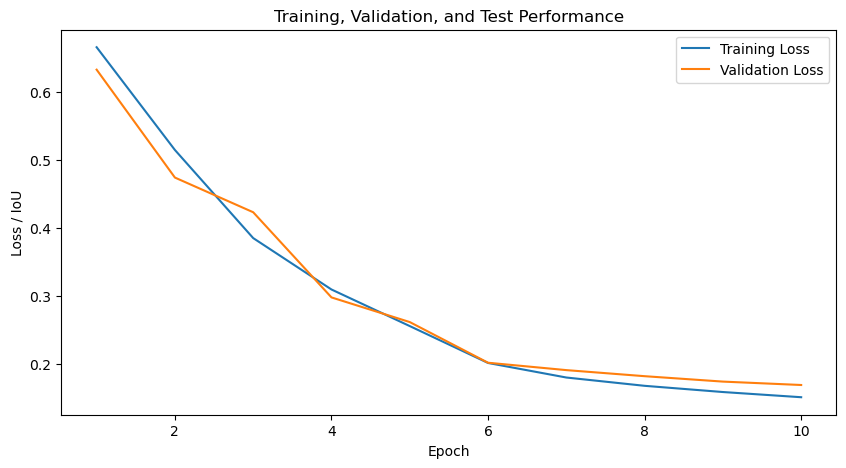

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.title("Training, Validation, and Test Performance")
plt.plot(range(1, len(train_losses) + 1), train_losses, label="Training Loss")
plt.plot(range(1, len(val_losses) + 1), val_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss / IoU")
plt.legend()
plt.show()

In [ ]:
import pyproj
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.utils import to_networkx

fig, axs = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('Ground plans with corners predicted', fontsize=16)
for ax, data in zip(axs.flat, test_disp):
    pred_y = model(data.to(device)).detach().cpu()
    
    pos = {}
    for i, coords in enumerate(data.x.cpu().numpy()):
        pos[i] = (coords[0], coords[1])
        
    g = to_networkx(data, to_undirected=True)
    
    # Predicted corner as node_color
    nx.draw(g, pos, ax=ax, node_size=100, node_color=pred_y, edgecolors='gray', cmap='binary')
    ax.axis("on")
    ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
    
plt.show()